In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('Data_fake_or_real_news.csv')
df

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


I am considering the text column as features as most often the text is what actually matters for deciding if it is fake or not 

In [9]:
X = df['text']
y = df['label'] 

In [10]:
# Train Test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)


In [11]:
# vectorizing the text

# I have considered max_df=0.7 that means ignoring words that are appering 70% or more beacuase words like this, is, are etc. does not help finding 
# authenticity of the news. As it is a hyper parameter, I am considering 0.7 accroding my knowledge
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [12]:
# Training the Naive Bayes classsifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [13]:
# Prediction and evalution
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8318863456985004
              precision    recall  f1-score   support

        FAKE       0.96      0.68      0.80       615
        REAL       0.76      0.97      0.86       652

    accuracy                           0.83      1267
   macro avg       0.86      0.83      0.83      1267
weighted avg       0.86      0.83      0.83      1267



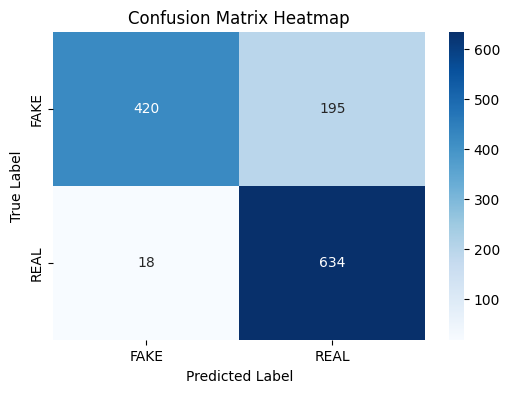

In [14]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

The confusion matrix shows that the classifier precited 195 of the fake news as real and 18 of the real news as fake. Although the classifier showed good performance by obtaining 83% accuracy, it tends to mis-classify fake news more. This may be caused by several resons like the dataset may contain fake news sanmple less than the real news, or may be the random_state or value of max_df casusing this behavior. So, efficient adjustment of those hyper parameters may lead to a more better performance.